# Three Body Simulation


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import animation
from scipy.optimize import fsolve

#Locating the Lagrange points for a given mass ratio

In [2]:
#Lagrange Point Location

def Lagrange_Points(mu):
  f = lambda x: x - (1 - mu)*(x+mu)/(abs(x + mu))**3 - mu*(x - 1 + mu)/(abs(x - 1 + mu))**3
  lx = fsolve(f, [-1, 0.5, 1.0])
  lxvals = [lx[1], lx[2], lx[0], 0.5 - mu, 0.5 - mu]
  lyvals = [0.0, 0.0, 0.0, 0.5*3**0.5, -0.5*3**0.5]
  return lxvals, lyvals



# Plotting the zero velocity curves for $\mu$ = 0.1

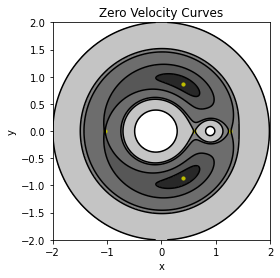

In [3]:
#This plots the zero velocity curves for different contour values helping us understand 
#how these curves change with change in the contour vlue
lxvals, lyvals = Lagrange_Points(0.1)

xvals = np.linspace(-2.0, 2.0, 400)
yvals = np.linspace(-2.0, 2.0, 400)

mu = 0.1

[X, Y] = np.meshgrid(xvals, yvals)
  
fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

Z = X**2 + Y**2 + 2*(1-mu)/np.sqrt((X + mu)**2 + Y**2) + 2*mu/np.sqrt((X - 1 + mu)**2 + Y**2)

ax.contourf(X, Y, Z, levels = [2.0, 2.95, 3.1, 3.47, 3.6, 5.0], cmap = 'gray')
ax.contour(X, Y, Z, levels = [2.0, 2.95, 3.1, 3.47, 3.6, 5.0],  colors = 'black')
ax.scatter(lxvals, lyvals, s = 10, c = 'y')
ax.set_title('Zero Velocity Curves')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# Euler Richardson method implementation 

In [4]:
def Euler_Richardson(xn, yn, vxn, vyn, mu, delta_t):
  p1n = ((xn + mu)**2 + yn**2)**1.5
  p2n = ((xn - 1 + mu)**2 + yn**2)**1.5
  axn = 2*vyn + xn - (1.0 - mu)*(xn + mu)/p1n - mu*(xn-1+mu)/p2n
  ayn = -2*vxn + yn - (1.0 - mu)*yn/p1n - mu*yn/p2n
  vxmid = vxn + 0.5*axn*delta_t
  vymid = vyn + 0.5*ayn*delta_t
  xmid = xn + 0.5*vxn*delta_t
  ymid = yn + 0.5*vyn*delta_t
  p1mid = ((xmid + mu)**2 + ymid**2)**1.5
  p2mid = ((xmid - 1 + mu)**2 + ymid**2)**1.5
  axmid = 2*vymid + xmid - (1.0 - mu)*(xmid + mu)/p1mid - mu*(xmid-1+mu)/p2mid
  aymid = -2*vxmid + ymid - (1.0 - mu)*ymid/p1mid - mu*ymid/p2mid
  vxn1 = vxn + axmid*delta_t
  vyn1 = vyn + aymid*delta_t
  xn1 = xn + vxmid*delta_t
  yn1 = yn + vymid*delta_t
  return xn1, yn1, vxn1, vyn1

# Plots of orbits when disturbed slightly from the lagrange points

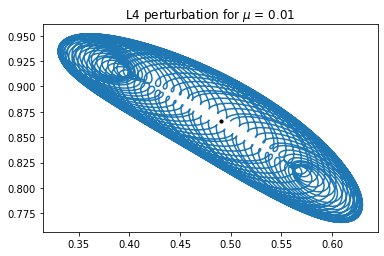

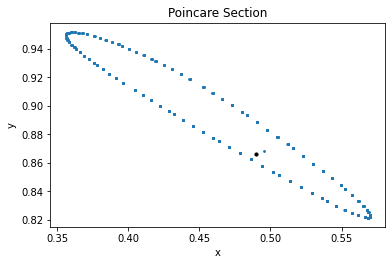

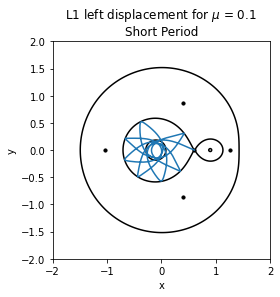

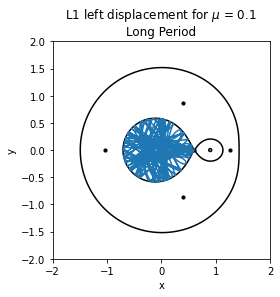

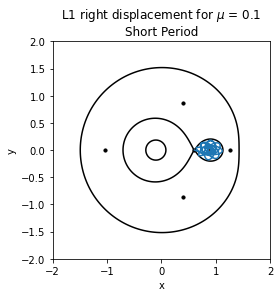

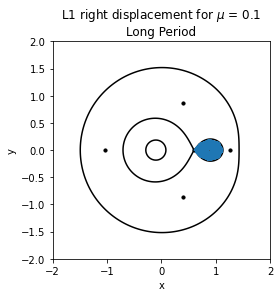

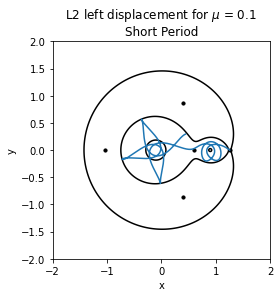

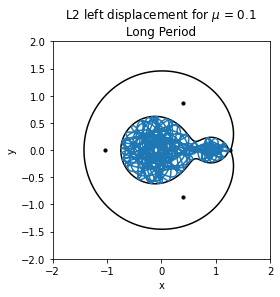

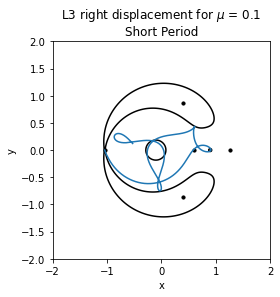

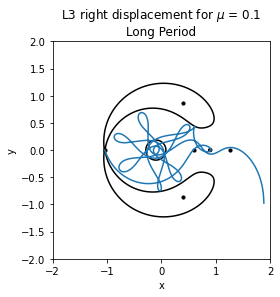

In [5]:
#The following section of code describes the orbits of particles disturbed slightly from the lagrange points
#The initial positions are described by xinit and yinit
#The time steps are given by delta_t_vals and lengths for short and long time simulations are given in
#the arrays tot_snaps_small and tot_snaps _large respectively for perturbations from L1, L2, L3 
#For L4, only one length is used and the poincare section which allows usto see if the orbit is bounded is also plotted
#For L4, mu = 0.01 and mu = 0.1 for the others to ensure that L4 remains a point of stable equilibrium

lxvals, lyvals = Lagrange_Points(0.01)
xinit = [lxvals[3] + 1e-2, 0.608, 0.61, 1.258, -1.041]
yinit = [lyvals[3], 0.0001, 0.0001, 0.0001, 0.0001]
tot_snaps_small = [600000, 120000, 120000, 120000, 200000]
tot_snaps_large = [600000, 1200000, 1200000, 1200000, 300000]
my_levels = [2.91, 3.6, 3.6, 3.47, 3.1]
delta_t_vals = [0.001, 0.0001, 0.0001, 0.0001, 0.0001]

title_main = ['L4 perturbation for $\mu$ = 0.01', 'L1 left displacement for $\mu$ = 0.1\n', 
              'L1 right displacement for $\mu$ = 0.1\n',  'L2 left displacement for $\mu$ = 0.1\n',
              'L3 right displacement for $\mu$ = 0.1\n']

period = ['Short Period', 'Long Period']

mu = 0.1
xvals = np.linspace(-2.0, 2.0, 400)
yvals = np.linspace(-2.0, 2.0, 400)
  
[X, Y] = np.meshgrid(xvals, yvals)
  
Z = X**2 + Y**2 + 2*(1-mu)/np.sqrt((X + mu)**2 + Y**2) + 2*mu/np.sqrt((X - 1 + mu)**2 + Y**2)

for i in range(5):
  for j in range(2):

    if i == 0:
      if j == 1:
        continue

    y0 = yinit[i]
    x0 = xinit[i]
    xarr = [x0]
    yarr = [y0]
    vx0 = 0.0
    vy0 = 0.0
    delta_t = delta_t_vals[i]
    pxarr = []
    pyarr = []

    if j == 0:
      tot_snaps = tot_snaps_small[i]
    if j == 1:
      tot_snaps = tot_snaps_large[i]

    xc = x0
    yc = y0
    vxc = vx0
    vyc = vy0
    if i == 0:
      mu = 0.01
    if i > 0:
      mu = 0.1
    
    lxvals, lyvals = Lagrange_Points(mu)
    for k in range(tot_snaps):
      xc, yc, vxc, vyc = Euler_Richardson(xc, yc, vxc, vyc, mu, delta_t)
      xarr.append(xc)
      yarr.append(yc)
      if i == 0:
        if abs(vyc) <= 1e-4:
          if vxc > 1e-4:
            pxarr.append(xc)
            pyarr.append(yc)

    fig, ax = plt.subplots(1, 1)
    ax.set_aspect(1)    
    ax.plot(xarr, yarr)

    if i > 0:
      ax.contour(X, Y, Z, levels = [2.0, my_levels[i], 10.0],  colors = 'black')
      ax.scatter(lxvals, lyvals, s = 10, color = 'black')
      ax.set_title(title_main[i] + period[j])

    if i == 0:
      ax.scatter(lxvals[3], lyvals[3], s = 10, color = 'black')
      ax.set_title(title_main[i])

      fig, ax = plt.subplots(1, 1)
      ax.set_aspect(1)    
      ax.scatter(pxarr, pyarr, s = 2)
    
      ax.scatter(lxvals[3], lyvals[3], s = 10, color = 'black')
      ax.set_title('Poincare Section')
      
      ax.set_xlabel('x')
      ax.set_ylabel('y')
      plt.show()

    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

# Animations of orbits when disturbed slightly from the lagrange points

In [10]:
#The following code displays the animation of the orbits
#The animated orbits are saved as a video at 20fps ( The line can be uncommented after
#entering the path where the video is to be stored)

lxvals, lyvals = Lagrange_Points(0.01)

xinit = [lxvals[3] + 1e-2, 0.608, 0.61, 1.258, -1.041]
yinit = [lyvals[3], 0.0001, 0.0001, 0.0001, 0.0001]
tot_snaps = [120000, 120000, 120000, 120000, 200000]
my_levels = [2.91, 3.6, 3.6, 3.47, 3.1]

delta_t_vals = [0.001, 0.0001, 0.0001, 0.0001, 0.0001]

file_names = ['L4', 'L1_left', 'L1_right', 'L2_left', 'L3_right']
title_main = ['L4 perturbation for $\mu$ = 0.01', 'L1 left displacement for $\mu$ = 0.1\n', 
              'L1 right displacement for $\mu$ = 0.1\n',  'L2 left displacement for $\mu$ = 0.1\n',
              'L3 right displacement for $\mu$ = 0.1\n']

line1, = ax.plot([], [], 'b', lw=1)
def init1():
    ax.set_xlim(0.3, 0.7)
    ax.set_ylim(0.75, 1.0)
    return line1,

def init2():
    ax.set_xlim(-2.0, 2.0)
    ax.set_ylim(-2.0, 2.0)
    return line1,

def update(k):
  line1.set_data(xarr[:k], yarr[:k])
  return line1,

for i in range(5):

  y0 = yinit[i]
  x0 = xinit[i]
  xarr = [x0]
  yarr = [y0]
  vx0 = 0.0
  vy0 = 0.0
  delta_t = delta_t_vals[i]
  pxarr = []
  pyarr = []

  xc = x0
  yc = y0
  vxc = vx0
  vyc = vy0

  if i == 0:
    mu = 0.01
  if i > 0:
    mu = 0.1
    
  lxvals, lyvals = Lagrange_Points(mu)

  for k in range(tot_snaps[i]):
    xc, yc, vxc, vyc = Euler_Richardson(xc, yc, vxc, vyc, mu, delta_t)
    xarr.append(xc)
    yarr.append(yc)

  fig, ax = plt.subplots(1, 1)
  ax.set_aspect(1)  
  if i > 0:
    ax.contour(X, Y, Z, levels = [2.0, my_levels[i], 10.0],  colors = 'black')
    ax.scatter(lxvals, lyvals, s = 10, color = 'black')

  if i == 0:
    ax.scatter(lxvals[3], lyvals[3], s = 10, color = 'black')

  ax.set_title(title_main[i])
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  line1, = ax.plot([], [], 'b', lw=1)
  init = None
  if i == 0:
    init = init1
  if i > 0:
    init = init2
  
  ani = animation.FuncAnimation(fig, update, frames=range(0, tot_snaps[i], 100),
                    init_func=init, blit=True)
  
  #For saving the file ( You can uncomment the below line after entering
  #the required file path for the video to be stored)
  # ani.save('/content/drive/MyDrive/{}_animation.mp4'.format(file_names[i]), fps = 20)

  plt.close(fig)
  